In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv('covid_19_data.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0
116804,116805,09/23/2020,Zuid-Holland,Netherlands,2020-09-24 04:23:38,29513.0,1372.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [ ]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

In [ ]:
data.info()

In [ ]:
data = data.rename(columns={"ObservationDate":"Date","Country/Region":"Country"})

In [ ]:
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Active
116800,116801,2020-09-23,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0,1942.0
116801,116802,2020-09-23,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0,1198.0
116802,116803,2020-09-23,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0,9.0
116803,116804,2020-09-23,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0,2246.0
116804,116805,2020-09-23,Zuid-Holland,Netherlands,2020-09-24 04:23:38,29513.0,1372.0,0.0,28141.0


In [ ]:
### Get the Latest Data
latest = data[data['Date'] == data['Date'].max()]
latest.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Active
116062,116063,2020-09-23,NaN,Afghanistan,2020-09-24 04:23:38,39145.0,1446.0,32610.0,5089.0
116063,116064,2020-09-23,NaN,Albania,2020-09-24 04:23:38,12787.0,370.0,7139.0,5278.0
116064,116065,2020-09-23,NaN,Algeria,2020-09-24 04:23:38,50400.0,1698.0,35428.0,13274.0
116065,116066,2020-09-23,NaN,Andorra,2020-09-24 04:23:38,1753.0,53.0,1203.0,497.0
116066,116067,2020-09-23,NaN,Angola,2020-09-24 04:23:38,4363.0,159.0,1473.0,2731.0


In [ ]:
len(latest)

743

In [ ]:
latest['Country'].value_counts()

Russia         83
US             58
Japan          49
India          37
Colombia       34
               ..
Eswatini        1
Israel          1
Mauritius       1
Ivory Coast     1
Rwanda          1
Name: Country, Length: 190, dtype: int64

In [ ]:
#### Group Data by Country
world = latest.groupby("Country")["Confirmed","Deaths","Recovered","Active"].sum()
world = world.reset_index()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,39145.0,1446.0,32610.0,5089.0
1,Albania,12787.0,370.0,7139.0,5278.0
2,Algeria,50400.0,1698.0,35428.0,13274.0
3,Andorra,1753.0,53.0,1203.0,497.0
4,Angola,4363.0,159.0,1473.0,2731.0


In [ ]:
world['Country'].value_counts()

Italy          1
Zambia         1
Tunisia        1
Iran           1
Japan          1
              ..
Eswatini       1
Israel         1
Mauritius      1
Ivory Coast    1
Canada         1
Name: Country, Length: 190, dtype: int64

In [ ]:
#### World Map Plot
world_map = px.choropleth(world,locations="Country",locationmode="country names",
                          color_continuous_scale="reds",color="Active",
                          range_color=[0,200000],title="Active Cases")
world_map.show()

In [ ]:
#### Plot Active Cases vs Date Graph
total_active_cases = data.groupby("Date")["Active"].sum().reset_index()
total_active_cases

,Date,Active
0,2020-01-22,510.0
1,2020-01-23,605.0
2,2020-01-24,879.0
3,2020-01-25,1357.0
4,2020-01-26,2010.0
...,...,...
241,2020-09-19,8810095.0
242,2020-09-20,8815987.0
243,2020-09-21,8887511.0
244,2020-09-22,8923075.0


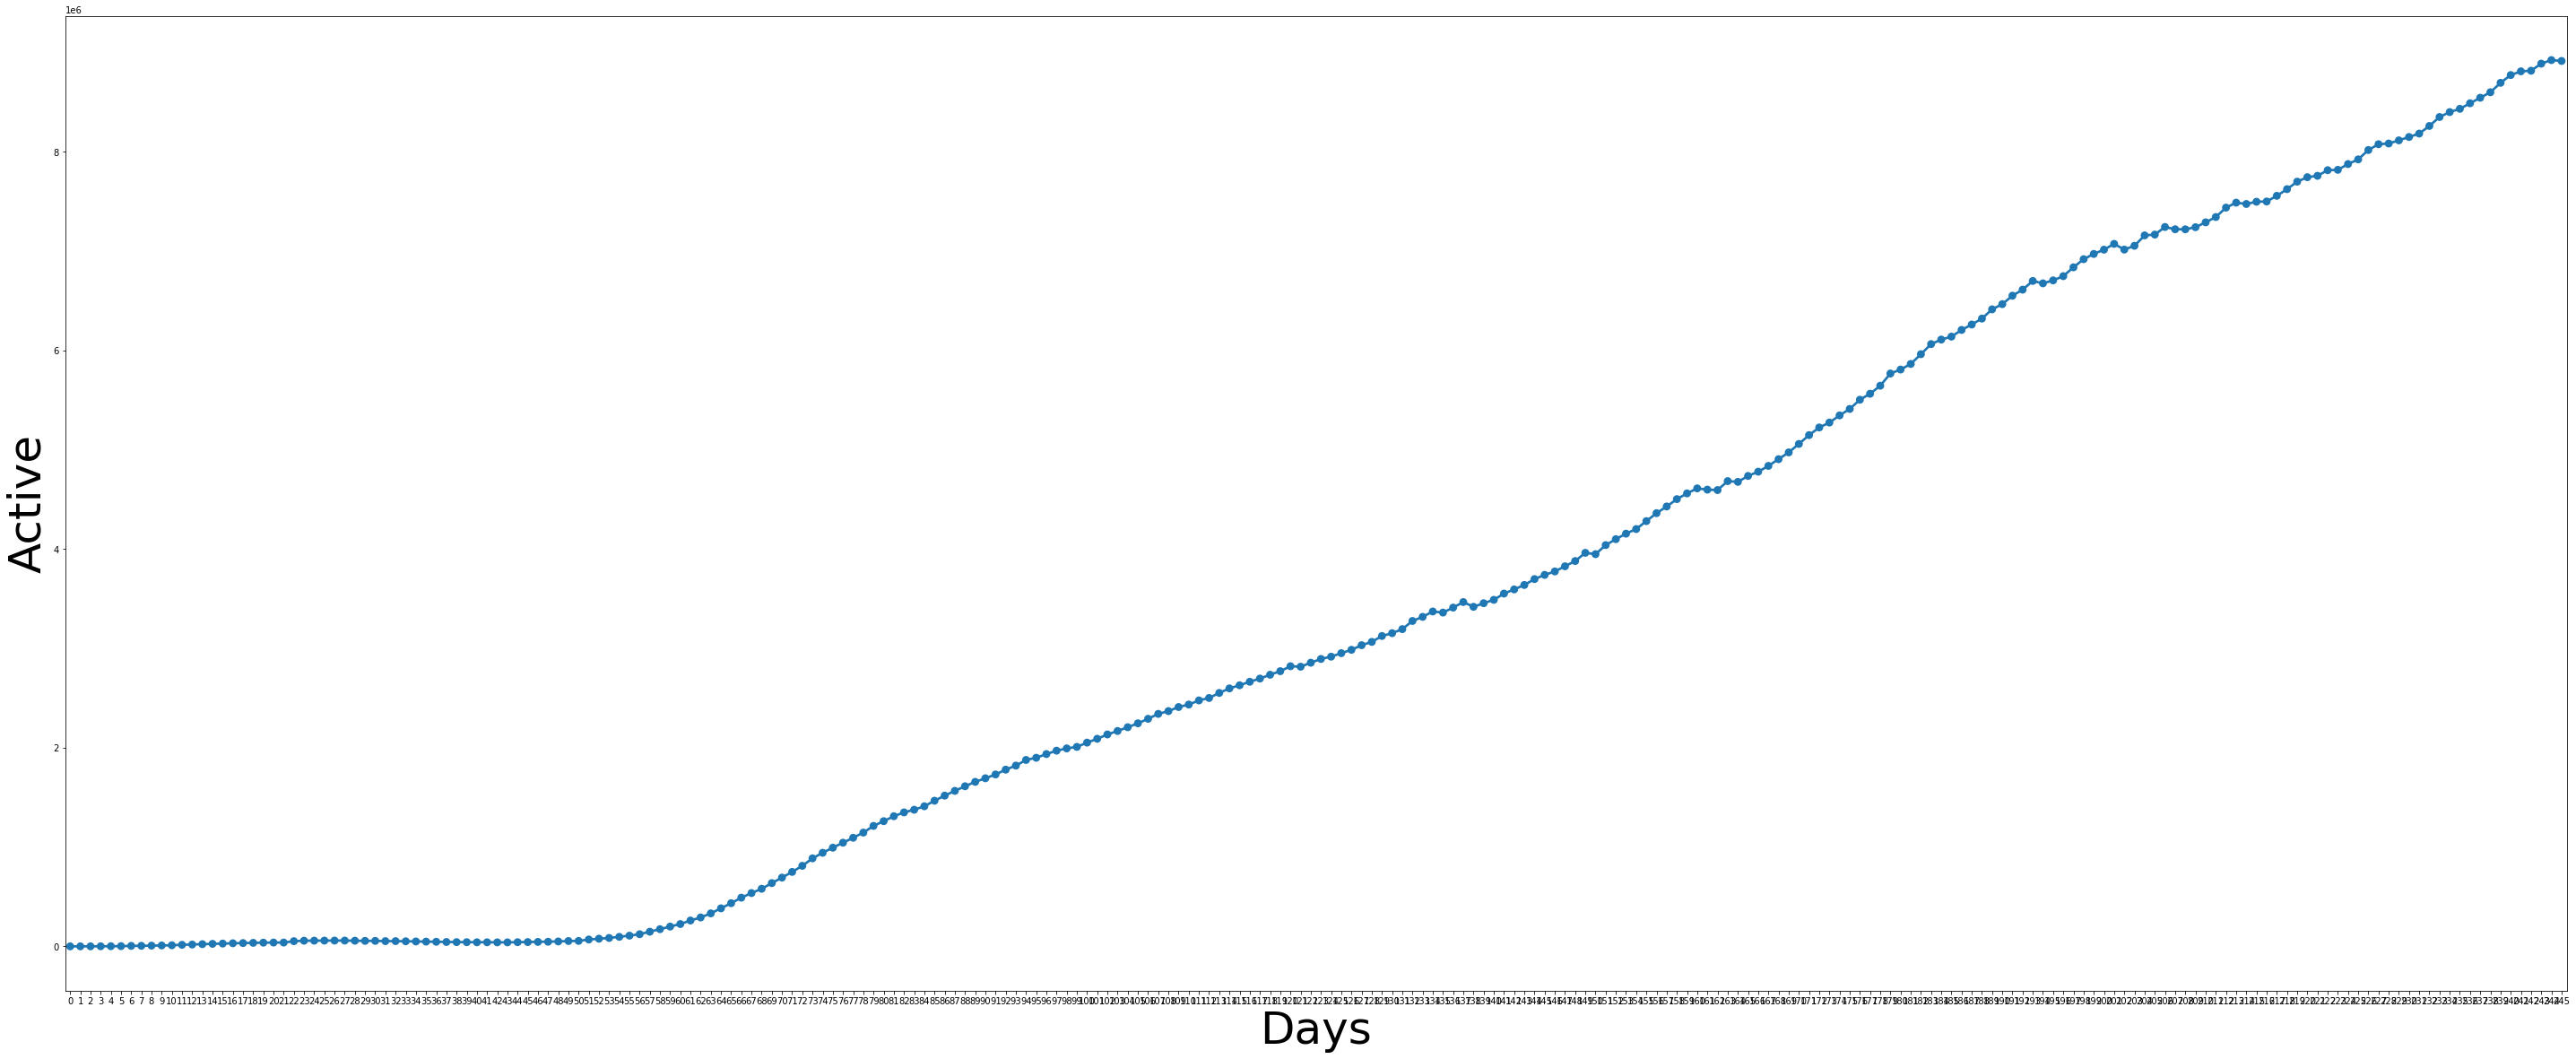

In [ ]:
plt.figure(figsize=(50,20))
plt.xlabel("Days",fontsize=50)
plt.ylabel("Active Cases",fontsize=50)
sns.pointplot(x = total_active_cases.index,y = total_active_cases['Active'])
plt.show()

In [ ]:
total_cases = data.groupby("Date")["Active","Confirmed","Recovered","Deaths"].sum().reset_index()
total_cases

In [ ]:
plt.figure(figsize=(50,20))
plt.xlabel("Days",fontsize=50)
plt.ylabel("Cases",fontsize=50)
sns.pointplot(x = total_cases.index,y = total_cases['Active'],color="blue")
sns.pointplot(x = total_cases.index,y = total_cases['Confirmed'],color="orange")
sns.pointplot(x = total_cases.index,y = total_cases['Recovered'],color="green")
sns.pointplot(x = total_cases.index,y = total_cases['Deaths'],color="red")
plt.show()

In [ ]:
### Top 20 Countries Having maximum confirmed cases and check the recovery rate
top = latest.groupby("Country")['Confirmed','Recovered'].sum()
top = top.sort_values("Confirmed",ascending=False).reset_index()
top.head()

In [ ]:
top_20 = top.head(20)
top_20

,Country,Confirmed,Recovered
0,US,6933548.0,2670256.0
1,India,5646010.0,4587613.0
2,Brazil,4591364.0,4046827.0
3,Russia,1117487.0,920602.0
4,Colombia,784268.0,662277.0
5,Peru,776546.0,636489.0
6,Mexico,710049.0,601611.0
7,Spain,693556.0,150376.0
8,South Africa,665188.0,594229.0
9,Argentina,664799.0,525486.0


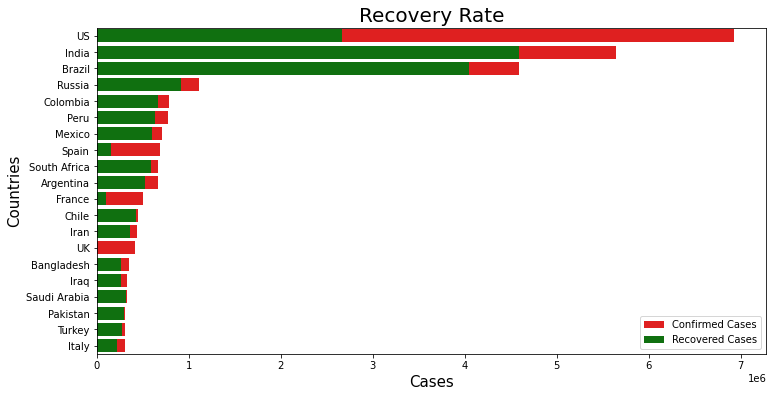

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_20['Confirmed'],y=top_20['Country'],color="red",label="Confirmed Cases")
sns.barplot(x=top_20['Recovered'],y=top_20['Country'],color="green",label="Recovered Cases")
plt.title("Recovery Rate",fontsize=20)
plt.xlabel("Cases",fontsize=15)
plt.ylabel("Countries",fontsize=15)
plt.legend(loc='best')
plt.show()
plt.savefig("mygraph.png")

In [ ]:
india = data[data["Country"]=="India"]
india

In [ ]:
india.isnull().sum()

In [ ]:
### Get the Latest Data
latest_india = india[india['Date'] == india['Date'].max()]
latest_india.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Active
116249,116250,2020-09-23,Andaman and Nicobar Islands,India,2020-09-24 04:23:38,3691.0,52.0,3479.0,160.0
116250,116251,2020-09-23,Andhra Pradesh,India,2020-09-24 04:23:38,639302.0,5461.0,562376.0,71465.0
116266,116267,2020-09-23,Arunachal Pradesh,India,2020-09-24 04:23:38,7844.0,14.0,5778.0,2052.0
116267,116268,2020-09-23,Assam,India,2020-09-24 04:23:38,161393.0,586.0,130950.0,29857.0
116289,116290,2020-09-23,Bihar,India,2020-09-24 04:23:38,171255.0,873.0,157454.0,12928.0


In [ ]:
states = latest_india.groupby("Province/State")["Confirmed","Deaths","Recovered","Active"].sum()
states = states.reset_index()
states.head()

In [ ]:
states['Province/State'].value_counts()

Tamil Nadu                                  1
Sikkim                                      1
Madhya Pradesh                              1
Karnataka                                   1
Uttarakhand                                 1
Haryana                                     1
Himachal Pradesh                            1
Kerala                                      1
Jammu and Kashmir                           1
West Bengal                                 1
Andhra Pradesh                              1
Gujarat                                     1
Andaman and Nicobar Islands                 1
Chandigarh                                  1
Ladakh                                      1
Meghalaya                                   1
Punjab                                      1
Tripura                                     1
Uttar Pradesh                               1
Jharkhand                                   1
Dadra and Nagar Haveli and Daman and Diu    1
Goa                               

In [ ]:
len(states)

37